Patient Name: HARDY^JOSEPH^L
Modality: MR
Study Date: 20170620
Image Size: 256 x 256


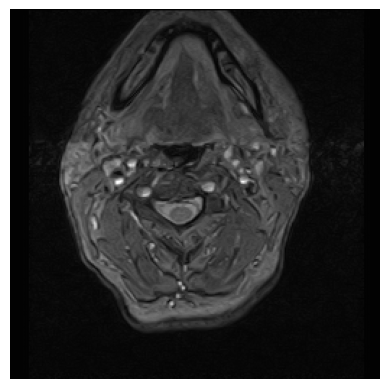

(0008, 0008): Image Type = ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016): SOP Class UID = 1.2.840.10008.5.1.4.1.1.4
(0008, 0018): SOP Instance UID = 1.2.392.200036.9123.100.12.11.12069.20170620112319.6.5
(0008, 0020): Study Date = 20170620
(0008, 0021): Series Date = 20170620
(0008, 0022): Acquisition Date = 20170620
(0008, 0023): Content Date = 20170620
(0008, 0030): Study Time = 104427
(0008, 0031): Series Time = 111531.870
(0008, 0032): Acquisition Time = 111556.070
(0008, 0033): Content Time = 111556.070
(0008, 0050): Accession Number = 10788240
(0008, 0060): Modality = MR
(0008, 0070): Manufacturer = HITACHI MEDICAL CORPORATION
(0008, 0080): Institution Name = EMERYVILLE ADVANCED IMAGING
(0008, 0090): Referring Physician's Name = CARO-BRUCE^EMILY
(0008, 0094): Referring Physician's Telephone Numbers = (510) 225-1013
(0008, 1010): Station Name = AIRIS2-2
(0008, 1030): Study Description = MR Cervical Spine WO
(0008, 103e): Series Description = SG 3D AX
(0008, 1040): Institutional De

/home/joe/miniconda3/envs/dicom-wsl/lib/python3.9/site-packages/pydicom/valuerep.py:443: UserWarning: The value length (120) exceeds the maximum length of 64 allowed for VR LO.
  warnings.warn(msg)


In [2]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# 1. Read a DICOM file
ds = pydicom.dcmread("/mnt/d/Dev2/DICOM/data/cMRI/cMRI/S0000001/O0000084")

# 2. Access metadata (DICOM tags)
print(f"Patient Name: {ds.PatientName}")
print(f"Modality: {ds.Modality}")
print(f"Study Date: {ds.StudyDate}")
print(f"Image Size: {ds.Rows} x {ds.Columns}")

# 3. Access and display the image
pixel_array = ds.pixel_array

# Basic image display
plt.imshow(pixel_array, cmap='gray')
plt.axis('off')
plt.show()

# 4. Basic image processing
# Normalize pixel values to 0-255
normalized_image = ((pixel_array - pixel_array.min()) / 
                   (pixel_array.max() - pixel_array.min()) * 255).astype(np.uint8)

# Properly handle the compressed data
if ds.file_meta.TransferSyntaxUID.is_compressed:
    # Create a new dataset without compression
    new_ds = pydicom.Dataset()
    new_ds.is_little_endian = True

    
    new_ds.is_implicit_VR = True
    
    # Copy the original dataset attributes
    new_ds = ds.copy()
    
    # Change the transfer syntax to explicit VR little endian
    new_ds.file_meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian
    
    # Update pixel data
    new_ds.PixelData = normalized_image.tobytes()
    
    # Save the new dataset
    new_ds.save_as("modified_image.dcm")
else:
    # If not compressed, save directly
    ds.PixelData = normalized_image.tobytes()
    ds.save_as("modified_image.dcm")
    
# 6. Working with DICOM tags
# List all available tags
for elem in ds:
    print(f"{elem.tag}: {elem.name} = {elem.value}")

# 7. Anonymize a DICOM file
def anonymize_dicom(dataset):
    # Remove patient information
    dataset.PatientName = "ANONYMOUS"
    dataset.PatientID = "12345"
    dataset.PatientBirthDate = ""
    return dataset

# 8. Window/Level adjustment (common in medical imaging)
def apply_window_level(pixel_array, window_center, window_width):
    min_value = window_center - window_width // 2
    max_value = window_center + window_width // 2
    windowed = np.clip(pixel_array, min_value, max_value)
    return windowed